In [ ]:
pip install -r requirements.txt

In [12]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [13]:
wildCropsDF = dd.read_csv("Data/A global database for the distributions of crop wild relatives/wildCrops.csv", sep='\t', dtype={'recordNumber': 'object',
       'speciesKey': 'float64'}, on_bad_lines='skip')

In [14]:
wildCropsDF.shape

(Delayed('int-a3d509d0-9097-46e2-b8a3-13f96b4e0283'), 50)

In [15]:
wildCropsDF.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')

In [16]:
wildCrops = wildCropsDF.compute()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (16,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dask\dataframe\io\csv.py:195: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

In [17]:
wildCropsSpecies = wildCrops[['species','decimalLatitude','decimalLongitude']]
wildCropsSpeciesNonNullCoordinates = wildCropsSpecies[wildCropsSpecies.notnull().all(1)]

In [18]:
wildCropsSpeciesNonNullCoordinates.head

<bound method NDFrame.head of                        species  decimalLatitude  decimalLongitude
1                 Ribes cereum        38.234699       -119.350601
3            Elymus saundersii        37.358154       -118.805267
5       Solanum agrimonifolium        14.932100        -91.906300
7         Dioscorea bartlettii        17.202500        -89.616800
8           Allium falcifolium        40.340000       -123.540000
...                        ...              ...               ...
141996          Setaria pumila        42.293300         27.618300
141998                Zea mays        20.130000       -103.330000
142004         Cicer arietinum        38.905300         48.395600
142006                Zea mays        44.100000         21.600000
142010         Capsicum annuum        37.306400         -4.654170

[1235244 rows x 3 columns]>

In [19]:
plantSpeciesGroupByCoordinates = wildCropsSpeciesNonNullCoordinates.groupby(
    ["decimalLatitude","decimalLongitude"], as_index=False
    )["species"].nunique()

In [20]:
plantSpeciesGroupByCoordinates.head()

,decimalLatitude,decimalLongitude,species
0,-80.334400,-84.192200,2
1,-80.333333,-84.166667,1
2,-60.666667,-60.666667,2
3,-60.500000,-60.500000,1
4,-60.250000,-60.250000,1


In [21]:
plantSpeciesGroupByCoordinates["species"].max()

4048

In [22]:
newColumnsTitles = ["species","decimalLatitude","decimalLongitude"]
plantSpeciesGroupByCoordinates=plantSpeciesGroupByCoordinates.reindex(columns=newColumnsTitles)

In [23]:
plantSpeciesGroupByCoordinates.head()

,species,decimalLatitude,decimalLongitude
0,2,-80.334400,-84.192200
1,1,-80.333333,-84.166667
2,2,-60.666667,-60.666667
3,1,-60.500000,-60.500000
4,1,-60.250000,-60.250000


In [24]:
plantSpeciesGroupByCoordinatesArray = plantSpeciesGroupByCoordinates.to_numpy()

In [25]:
plantSpeciesGroupByCoordinatesArray

array([[  2.      , -80.3344  , -84.1922  ],
       [  1.      , -80.333333, -84.166667],
       [  2.      , -60.666667, -60.666667],
       ...,
       [  1.      ,  89.166667, -13.483333],
       [  1.      ,  89.208333, -15.416667],
       [  2.      ,  89.716667, -48.166667]])

In [33]:
maxSpecies = int(plantSpeciesGroupByCoordinatesArray[:,0].max())

In [ ]:
rangeSpeciesNumber = np.arange(maxSpecies)

In [79]:
np.quantile(plantSpeciesGroupByCoordinatesArray[:,0], 0.90)

3.0

In [55]:
len(moreThanOne)

84557

In [84]:
colors = cm.copper(np.linspace(0, 1, 8))
def color(nbSpecies):
    if nbSpecies < 5:
        return colors[nbSpecies+1]
    else:
        return colors[7]
coordinateColors = [color(int(nbSpecies)) for nbSpecies in plantSpeciesGroupByCoordinatesArray[:,0]]

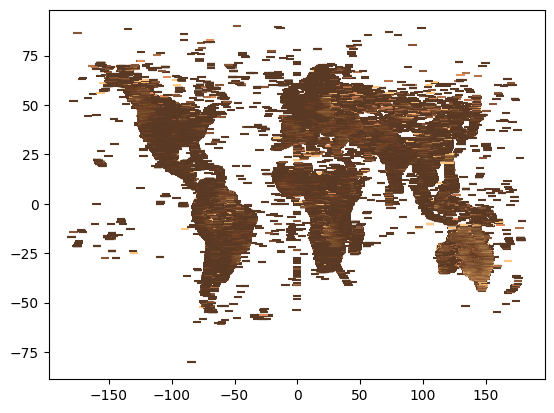

In [85]:
plt.scatter(plantSpeciesGroupByCoordinatesArray[:,2],plantSpeciesGroupByCoordinatesArray[:,1], marker="_",color= coordinateColors)

In [19]:
plantSpeciesGroupByCoordinates.min()

species               1.0000
decimalLatitude     -80.3344
decimalLongitude   -179.9300
dtype: float64

In [ ]:
plantSpeciesGroupByCoordinates.max()

species             4048.000000
decimalLatitude       89.716667
decimalLongitude     179.216800
dtype: float64